In [10]:
import pandas as pd
import numpy as np

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


In [11]:
train_filename_iq = ( './../datasets/dengue_test_iq.pkl' )
dengue_test_iq = pd.read_pickle( train_filename_iq )

test_filename_sj = ( './../datasets/dengue_test_sj.pkl' )
dengue_test_sj = pd.read_pickle( test_filename_sj )

submission_sj = pd.DataFrame( dengue_test_sj, columns = ['city'])
submission_iq = pd.DataFrame( dengue_test_iq, columns = ['city'])
submission_sj.reset_index( inplace = True)
submission_sj['year'] = submission_sj['week_start_date'].dt.year
submission_sj['weekofyear'] = submission_sj['week_start_date'].dt.weekofyear
submission_iq.reset_index( inplace = True)
submission_iq['year'] = submission_iq['week_start_date'].dt.year
submission_iq['weekofyear'] = submission_iq['week_start_date'].dt.weekofyear
submission = submission_sj.append( submission_iq )
submission.drop( columns = ['week_start_date'], inplace = True )
sub_sj = pd.DataFrame()
sub_iq = pd.DataFrame()

In [12]:
for month in range( 1, 13 ):
    train_filename = ( './../datasets/train_sj_month_' + str( month ) + '.pkl' )
    test_filename  = ( './../datasets/test_sj_month_' + str( month ) + '.pkl' )
    dengue_train_sj_month = pd.read_pickle( train_filename )
    dengue_test_sj_month  = pd.read_pickle( test_filename )
    X = pd.DataFrame( dengue_train_sj_month )
    X.drop( columns = ['city','year','total_cases','month'], inplace = True )
    y = dengue_train_sj_month.total_cases
    X_sj_Full_train, X_sj_Full_test, Y_sj_Full_train, Y_sj_Full_test = train_test_split(
                                                                    X, y, shuffle = False)
    param_grid = { 
        "n_estimators"      : [160,220,150],
        "max_features"      : ["sqrt"],
        "min_samples_split" : [10,12,18],
        "bootstrap"         : [True],
        "max_depth"         : [2,4,5,8]
        }
    estimator = RandomForestRegressor( criterion='mae', oob_score=True)
    rf_est = GridSearchCV(estimator, param_grid,
                          n_jobs=-1, cv=5, verbose=0,
                          iid=True ).fit( X_sj_Full_train, Y_sj_Full_train)
    Y_sj_test_pred = rf_est.best_estimator_.predict(X_sj_Full_test).astype(int)
    print ("San Juan Test  MAE error :", mean_absolute_error(Y_sj_test_pred, Y_sj_Full_test))
    Y_sj_train_pred = rf_est.best_estimator_.predict(X_sj_Full_train).astype(int)
    print ("San Juan Train MAE error :", mean_absolute_error(Y_sj_train_pred, Y_sj_Full_train))
    X_test = pd.DataFrame( dengue_test_sj_month, columns = X.columns )
    submit_pred_sj = pd.DataFrame( dengue_test_sj_month, columns = ['city','week_start_date'])
    submit_pred_sj['total_cases'] = rf_est.best_estimator_.predict(X_test).astype( 'int')
    sub_sj = sub_sj.append( submit_pred_sj, sort = False )
sub_sj = sub_sj.drop( columns=['week_start_date'])
sub_sj.reset_index( inplace = True )
sub_sj['year'] = sub_sj['week_start_date'].dt.year
sub_sj['weekofyear'] = sub_sj['week_start_date'].dt.weekofyear
sub_sj.drop( columns = ['week_start_date'], inplace = True )

San Juan Test  MAE error : 17.82608695652174
San Juan Train MAE error : 12.865671641791044
San Juan Test  MAE error : 13.555555555555555
San Juan Train MAE error : 7.574074074074074
San Juan Test  MAE error : 8.055555555555555
San Juan Train MAE error : 6.537037037037037
San Juan Test  MAE error : 7.3478260869565215
San Juan Train MAE error : 5.015151515151516
San Juan Test  MAE error : 7.277777777777778
San Juan Train MAE error : 5.8076923076923075
San Juan Test  MAE error : 12.61111111111111
San Juan Train MAE error : 7.425925925925926
San Juan Test  MAE error : 31.08695652173913
San Juan Train MAE error : 14.686567164179104
San Juan Test  MAE error : 34.72222222222222
San Juan Train MAE error : 23.64814814814815
San Juan Test  MAE error : 39.36842105263158
San Juan Train MAE error : 21.43859649122807
San Juan Test  MAE error : 31.772727272727273
San Juan Train MAE error : 27.21875
San Juan Test  MAE error : 31.333333333333332
San Juan Train MAE error : 25.87037037037037
San Juan Tes

In [13]:
for month in range( 1, 13 ):
    train_filename = ( './../datasets/train_iq_month_' + str( month ) + '.pkl' )
    test_filename  = ( './../datasets/test_iq_month_' + str( month ) + '.pkl' )
    dengue_train_iq_month = pd.read_pickle( train_filename )
    dengue_test_iq_month  = pd.read_pickle( test_filename )
    X = pd.DataFrame( dengue_train_iq_month )
    X.drop( columns = ['city','year','total_cases','month'], inplace = True )
    y = dengue_train_iq_month.total_cases
    X_iq_train, X_iq_test, Y_iq_train, Y_iq_test = train_test_split( X, y, shuffle = False)
    param_grid = { 
        "n_estimators"      : [160,220,100],
        "max_features"      : ["sqrt"],
        "min_samples_split" : [10,16,20],
        "bootstrap"         : [True],
        "max_depth"         : [2,4,5,8]
        }
    estimator = RandomForestRegressor( criterion='mae', oob_score=True)
    rf_est = GridSearchCV(estimator, param_grid,
                          n_jobs=-1, cv=5, verbose=0, iid=True).fit( X_iq_train, Y_iq_train )
    Y_iq_pred = rf_est.best_estimator_.predict(X_iq_test).astype(int)
    print ("Iquitos Test  MAE error :", mean_absolute_error(Y_iq_pred, Y_iq_test))
    pred_train_iq = rf_est.best_estimator_.predict(X_iq_train).astype(int)
    print ("Iquitos Train MAE error :", mean_absolute_error(pred_train_iq, Y_iq_train))
    X_test = pd.DataFrame( dengue_test_iq_month, columns = X.columns )
    submit_pred_iq = pd.DataFrame( dengue_test_iq_month, columns = ['city', 'week_start_date'])
    submit_pred_iq['total_cases'] = rf_est.best_estimator_.predict(X_test).astype( 'int')
    sub_iq = sub_iq.append( submit_pred_iq, sort = False )
sub_iq.drop( columns=['week_start_date'], inplace = True)
sub_iq.reset_index( inplace = True )
sub_iq['year'] = sub_iq['week_start_date'].dt.year
sub_iq['weekofyear'] = sub_iq['week_start_date'].dt.weekofyear
sub_iq.drop( columns = ['week_start_date'], inplace = True )

Iquitos Test  MAE error : 11.76923076923077
Iquitos Train MAE error : 5.243243243243243
Iquitos Test  MAE error : 11.9
Iquitos Train MAE error : 6.5
Iquitos Test  MAE error : 4.1
Iquitos Train MAE error : 3.8
Iquitos Test  MAE error : 2.3076923076923075
Iquitos Train MAE error : 2.27027027027027
Iquitos Test  MAE error : 2.3
Iquitos Train MAE error : 2.2666666666666666
Iquitos Test  MAE error : 1.6
Iquitos Train MAE error : 2.3333333333333335
Iquitos Test  MAE error : 2.0833333333333335
Iquitos Train MAE error : 1.6470588235294117
Iquitos Test  MAE error : 2.6
Iquitos Train MAE error : 1.4
Iquitos Test  MAE error : 11.0
Iquitos Train MAE error : 3.34375
Iquitos Test  MAE error : 17.5
Iquitos Train MAE error : 3.8857142857142857
Iquitos Test  MAE error : 6.2
Iquitos Train MAE error : 3.5
Iquitos Test  MAE error : 5.1
Iquitos Train MAE error : 11.533333333333333


In [14]:
submit = sub_sj.append( sub_iq, sort=True )

In [15]:
submission_RF = pd.merge( submission, submit, on=['city','year','weekofyear'], how='left' )

In [16]:
submission_RF.columns = ['city','year','weekofyear','total_cases']
submission_RF.to_excel("data/submission_month_RF.xlsx", index = False)

In [17]:
submission_RF.to_csv("data/submission_month_RF.csv", index = False)

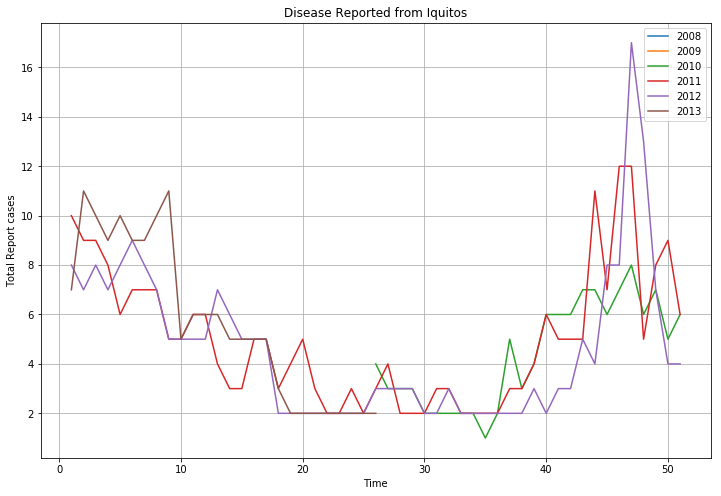

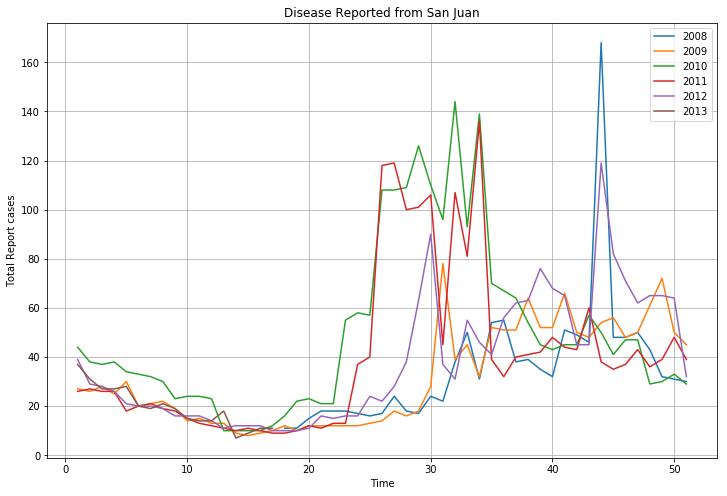

In [28]:
import matplotlib.pyplot as plt   # matplotlib's plotting framework
for city_name in ['iq', 'sj']:
    plt.figure( figsize=( 12, 8 ))
    data = submission_RF[submission_RF['city'] == city_name ]
    plt.xlabel('Time')
    plt.ylabel('Total Report cases')
    city_name = "Iquitos" if city_name == 'iq' else "San Juan"        # sj for San Juan and iq for Iquitos
    for year in submission_RF['year'].unique():
        yearwiseData = pd.DataFrame(data[(data['year'] == year) & (data['weekofyear'] < 52)], columns = ['weekofyear','total_cases'])
        plt.plot( yearwiseData.weekofyear,yearwiseData['total_cases'], label=year)
    title = 'Disease Reported from ' + city_name
    plt.grid()
    plt.legend()

    plt.title( title )
    filename = title + '.png'
    plt.savefig( filename )
    plt.show()
